# Matplotlib Introduction

Doc link: <https://matplotlib.org/stable/api/index>
Official Guide: <https://matplotlib.org/stable/users/index.html>

## Installation

| Using pip | Using conda |
|---|---|
|`pip install matplotlib` | `conda install matplotlib` |



<br>
<br>

## Import statement

In [10]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

**NOTE**:
- Don't forget the `.pyplot`
- `%matplotlib inline` is a Jupyter magic command for viewing the pyplot images within the notebooks


<br><br>

## First Example

Plotting a $y = sin(x)$ curve

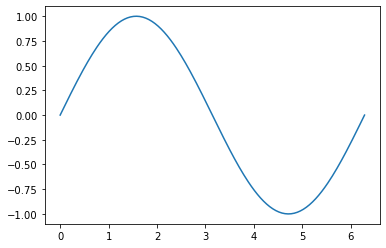

In [2]:
x = np.linspace(0, 2 * np.pi, 200)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

**NOTE**: The `plt.show()` command is not necessary in a notebook when we have added the `%matplotlib inline`. The command works with plt.show commented out!




<br>





## Anatomy of a Figure

source: <https://matplotlib.org/stable/gallery/showcase/anatomy.html>

**NOTE**: Ignore the next code cell, just look at the output!

In [9]:
# import os
import pathlib

#location to the output folder
output_path = pathlib.Path.cwd().parent / 'output'

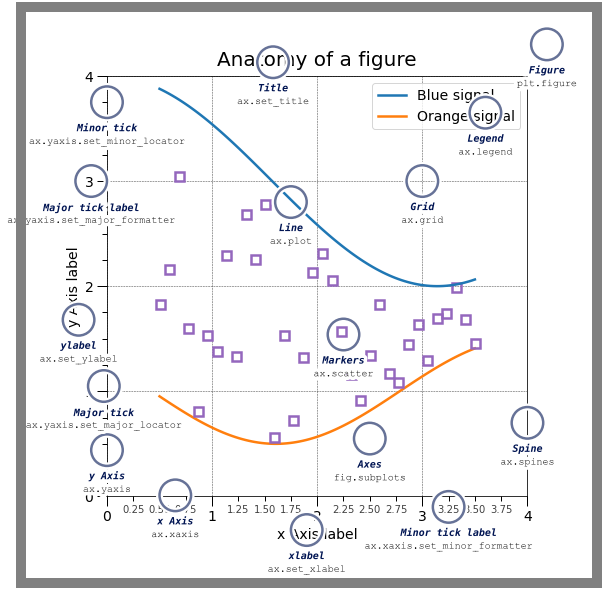

In [4]:
from matplotlib.patches import Circle, Rectangle
from matplotlib.patheffects import withStroke
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

royal_blue = "#002082"
royal_blue = [0, 20/256, 82/256]

# make the figure

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8), facecolor='1')
marg = 0.15
ax = fig.add_axes([marg, marg, 1-1.8*marg, 1-1.8*marg], aspect=1,
                  facecolor='1')


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return f"{x:.2f}"

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
# FuncFormatter is created and used automatically
ax.xaxis.set_minor_formatter(minor_tick)

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0, labelsize=14)
ax.tick_params(which='major', length=10, labelsize=14)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c='C0', lw=2.5, label="Blue signal", zorder=10)
ax.plot(X, Y2, c='C1', lw=2.5, label="Orange signal")
ax.plot(X[::3], Y3[::3], linewidth=0, markersize=9,
        marker='s', markerfacecolor='none', markeredgecolor='C4',
        markeredgewidth=2.5)

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("x Axis label", fontsize=14)
ax.set_ylabel("y Axis label", fontsize=14)

ax.legend(loc="upper right", fontsize=14)

# Annotate the figure


def just_circle(x, y, radius=0.15):
    c = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=2.5,
               edgecolor=royal_blue + [0.6], facecolor='none',
               path_effects=[withStroke(linewidth=7, foreground=(1, 1, 1, 1))])
    ax.add_artist(c)


def text(x, y, text):
    ax.text(x, y, text, zorder=100,
            ha='center', va='top', weight='bold', color=royal_blue,
            style='italic', fontfamily='monospace',
            path_effects=[withStroke(linewidth=7, foreground=(1, 1, 1, 1))])


def code(x, y, text):
    ax.text(x, y, text, zorder=100,
            ha='center', va='top', weight='normal', color='0.0',
            fontfamily='Courier New', fontsize='medium',
            path_effects=[withStroke(linewidth=7, foreground=(1, 1, 1, 1))])


def circle(x, y, txt, cde, radius=0.15):
    just_circle(x, y, radius=radius)
    text(x, y-0.2, txt)
    code(x, y-0.33, cde)

# Minor tick label
circle(3.25, -0.10, "Minor tick label",
       "ax.xaxis.set_minor_formatter")

# Major tick
circle(-0.03, 1.05, "Major tick", "ax.yaxis.set_major_locator")

# Minor tick
y = 3.75
circle(0.00, 3.75, "Minor tick", "ax.yaxis.set_minor_locator")

# Major tick label
circle(-0.15, 3.00, "Major tick label", "ax.yaxis.set_major_formatter")

# X Label
circle(1.90, -0.32, "xlabel", "ax.set_xlabel")

# Y Label
circle(-0.27, 1.68, "ylabel", "ax.set_ylabel")

# Title
circle(1.58, 4.13, "Title", "ax.set_title")

# Blue plot
circle(1.75, 2.80, "Line", "ax.plot")

# Scatter plot
circle(2.25, 1.54, "Markers", "ax.scatter")

# Grid
circle(3.00, 3.00, "Grid", "ax.grid")

# Legend
circle(3.60, 3.65, "Legend", "ax.legend")

# Axes
circle(2.5, 0.55, "Axes", "fig.subplots")

# Figure
circle(4.185, 4.3, "Figure", "plt.figure")

# x Axis
circle(0.65, 0.01, "x Axis", "ax.xaxis")

# y Axis
circle(0, 0.44, "y Axis", "ax.yaxis")

# Spine
circle(4.0, 0.7, "Spine", "ax.spines")

# frame around figure...
fig.add_artist(Rectangle((0, 0), width=1, height=1, facecolor='none',
               edgecolor='0.5', linewidth=10))

plt.show()

<a id='Anatomy'></a>
<br><br>


## Coding Styles

There are two broad styles to draw a diagram in matplotlib:

1. Functional
2. Object Oriented

The Object-oriented version allows us to make more complicated diagrams. For easier diagrams using `seaborn` is the way to go!


<br>

### Functional Style

Also called the pyplot-style

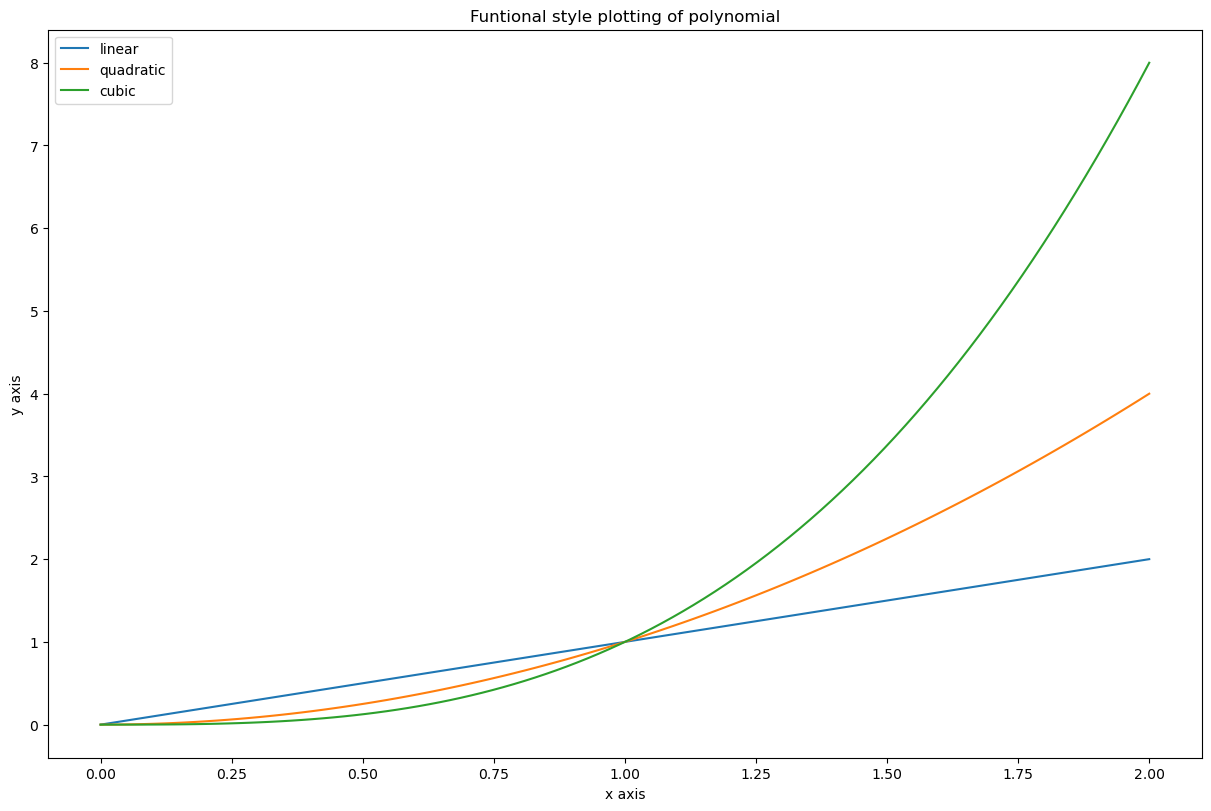

In [11]:
# data
x = np.linspace(0, 2, 100)


plt.figure(figsize=(12,8), dpi=100, constrained_layout=True)
plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title("Funtional style plotting of polynomial")
plt.legend()
plt.savefig(output_path/'matplotlib_1.png', bbox_inches='tight')

Notice that:
- We never mention any axes.
- The axes are implicit here.
- All the plots have common axes.


<br>

### OO-Style

- More common in Python
- Better customizability

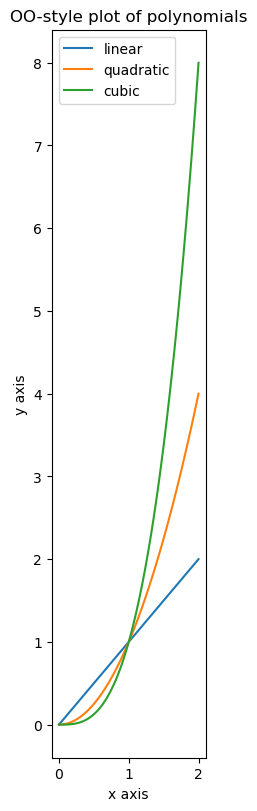

In [6]:
x = np.linspace(0, 2, 100)

fig, ax1 = plt.subplots(figsize=(2,8), dpi=100, constrained_layout=True)

ax1.plot(x, x, label='linear')
ax1.plot(x, x**2, label='quadratic')
ax1.plot(x, x**3, label='cubic')

ax1.set_xlabel('x axis')
ax1.set_ylabel('y axis')
ax1.set_title("OO-style plot of polynomials")
ax1.legend()

In [7]:
type(fig)

matplotlib.figure.Figure

In [8]:
type(ax1)

matplotlib.axes._subplots.AxesSubplot

Notice that:
- `subplot` function return two objects
    1. `matplotlib.figure.Figure`
    2. `matplotlib.axes._subplots.AxesSubplot`
    in that order
- Then we manipulate the `axes` object `ax1` to create our diagram

***
<br><br><br>

# Advanced Commands

<br>

## Logarithmic Scale

Use the `set_yscale` or `set_xscale` to change the y and x scales respectively.

Some of the options available are:
1. 'linear': Standard scale
2. 'log': Logarithmic scale
3. 'symlog'
    - The symmetrical logarithmic scale is logarithmic in both the positive and negative directions from the origin.
4. 'logit'
    - This scale is similar to a 'log' scale close to zero and to one, and almost linear around 0.5. It maps the interval $(0, 1)$ onto $(-\infty, +\infty)$.
5. [custom 'matplotlib.scale.ScaleBase' object](https://matplotlib.org/stable/gallery/scales/custom_scale.html)
6. There are a few more too!

The next piece of code illustrates these scales.
Copied from the documentation at <https://matplotlib.org/stable/gallery/scales/scales.html>

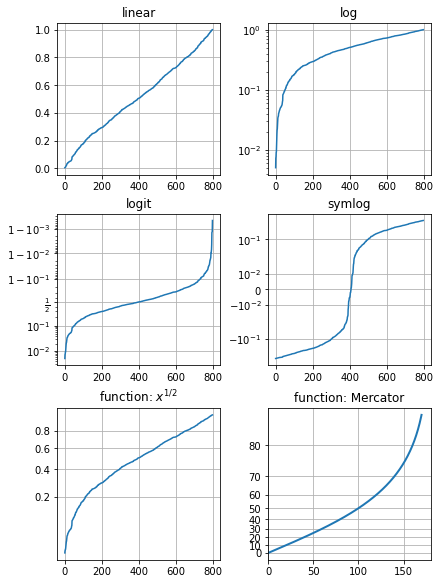

In [9]:
from matplotlib.ticker import NullFormatter, FixedLocator

# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the interval ]0, 1[
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
fig, axs = plt.subplots(3, 2, figsize=(6, 8),
                        constrained_layout=True)

# linear
ax = axs[0, 0]
ax.plot(x, y)
ax.set_yscale('linear')
ax.set_title('linear')
ax.grid(True)


# log
ax = axs[0, 1]
ax.plot(x, y)
ax.set_yscale('log')
ax.set_title('log')
ax.grid(True)


# symmetric log
ax = axs[1, 1]
ax.plot(x, y - y.mean())
ax.set_yscale('symlog', linthresh=0.02)
ax.set_title('symlog')
ax.grid(True)

# logit
ax = axs[1, 0]
ax.plot(x, y)
ax.set_yscale('logit')
ax.set_title('logit')
ax.grid(True)


# Function x**(1/2)
def forward(x):
    return x**(1/2)


def inverse(x):
    return x**2


ax = axs[2, 0]
ax.plot(x, y)
ax.set_yscale('function', functions=(forward, inverse))
ax.set_title('function: $x^{1/2}$')
ax.grid(True)
ax.yaxis.set_major_locator(FixedLocator(np.arange(0, 1, 0.2)**2))
ax.yaxis.set_major_locator(FixedLocator(np.arange(0, 1, 0.2)))


# Function Mercator transform
def forward(a):
    a = np.deg2rad(a)
    return np.rad2deg(np.log(np.abs(np.tan(a) + 1.0 / np.cos(a))))


def inverse(a):
    a = np.deg2rad(a)
    return np.rad2deg(np.arctan(np.sinh(a)))

ax = axs[2, 1]

t = np.arange(0, 170.0, 0.1)
s = t / 2.

ax.plot(t, s, '-', lw=2)

ax.set_yscale('function', functions=(forward, inverse))
ax.set_title('function: Mercator')
ax.grid(True)
ax.set_xlim([0, 180])
ax.yaxis.set_minor_formatter(NullFormatter())
ax.yaxis.set_major_locator(FixedLocator(np.arange(0, 90, 10)))

plt.show()

## Improving Text

### Custom ticks

We can customize 
1. Ticks
2. Tick labels

on the x and y axis.

(Look back at the [Anatomy of a Figure](#Anatomy) diagram for a reminder about these terms)

**TLDR**: You can use the following axes methods
- `set_xticks`
- `set_yticks`
- `set_xticklabels`
- `set_yticklabels`

In order to use $\LaTeX$ in the graphs use `$` inside strings. If that doesn't work try adding an r in front of the strings to send in a *raw string*. Like so: `r'$\alpha$'`

[Text(0, 0, '$0.0$'),
 Text(0, 50, '$50.0$'),
 Text(0, 100, '$100.0$'),
 Text(0, 150, '$150.0$')]

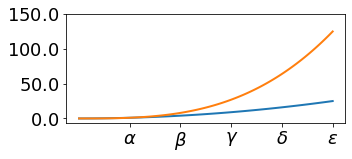

In [24]:
x = np.linspace(0, 5, 100)
fig, ax = plt.subplots(figsize=(5, 2))

ax.plot(x, x**2, x, x**3, lw=2)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18) # use LaTeX formatted labels

<br>

### Better Labels Using `ticker`

We can use the `ticker` class from matplotlib to improve the tick label formatting.

Can be important for large numbers

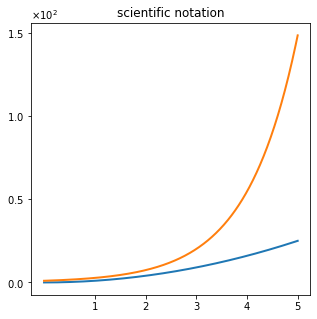

In [25]:
x = np.linspace(0, 5, 500)
fig, ax = plt.subplots(figsize=(5, 5))
      
ax.plot(x, x**2, x, np.exp(x), lw=2)
ax.set_title("scientific notation")

ax.set_yticks([0, 50, 100, 150])
ax.set_xticks([1, 2, 3, 4, 5])

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter) 

<br>

### Axis Label Spacing

- You can change the distance between axes ticks and the axes using the `major.pad` attribute of `xtick` and `ytick`
- To change the distance between axes labels and axes ticks use the `labelpad` attribute of `ax.xaxis` and `ax.yaxis`. 

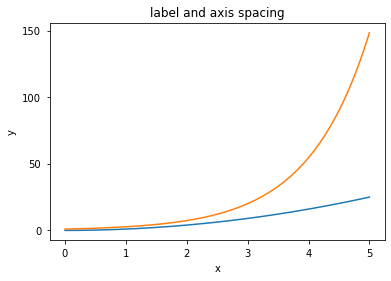

In [28]:
import matplotlib
# distance between x and y axis and the numbers on the axes
matplotlib.rcParams['xtick.major.pad'] = 5
matplotlib.rcParams['ytick.major.pad'] = 5

fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("label and axis spacing")

# padding between axis label and axis numbers
ax.xaxis.labelpad = 5
ax.yaxis.labelpad = 5

ax.set_xlabel("x")
ax.set_ylabel("y");

<br>

### Axes Splines / Axes Lines

The bounding square is called the spline. 


(Look back at the [Anatomy of a Figure](#Anatomy) diagram for a reminder)

You can change various properties of your spline using spline methods like `set_color` and `set_linewidth`

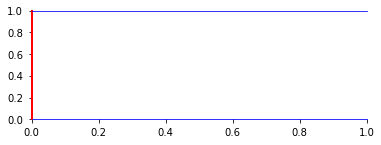

In [29]:
fig, ax = plt.subplots(figsize=(6,2))

ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_color('blue')

ax.spines['left'].set_color('red')
ax.spines['left'].set_linewidth(2)

# turn off axis spine to the right
ax.spines['right'].set_color("none")
ax.yaxis.tick_left() # only ticks on the left side